In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import os
os.chdir('C:/Users/PRATEEK/Desktop/Intellify intern')

In [3]:
dataset=pd.read_csv('StudentsPerformance.csv')

In [4]:
dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [5]:
passmark = 40

In [6]:
dataset.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


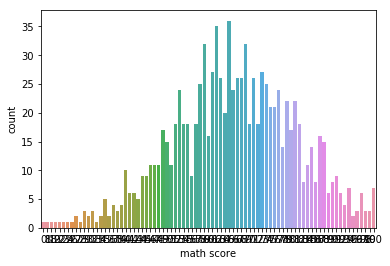

In [7]:
#Exploring Math's Score
p = sns.countplot(x="math score", data = dataset)


Student's Scoring Analysis in Maths (Pass/Fail) Analysis

In [8]:

dataset['Math_PassStatus'] = np.where(dataset['math score']<passmark, 'F', 'P')
dataset.Math_PassStatus.value_counts()

P    960
F     40
Name: Math_PassStatus, dtype: int64

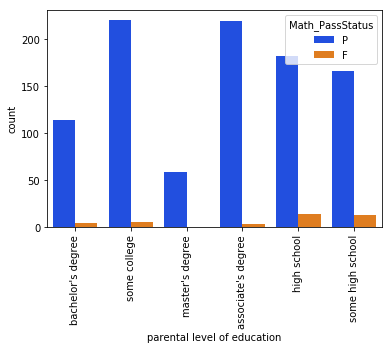

In [9]:
p = sns.countplot(x='parental level of education', data = dataset, hue='Math_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

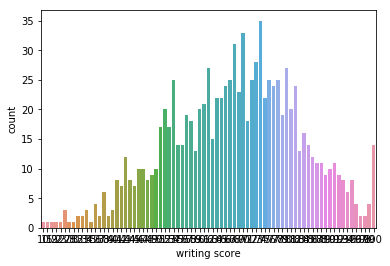

In [10]:
#Exploring Writing Score
p = sns.countplot(x="writing score", data = dataset)

#### Students Performance in Writing (Pass/Fail)Analysis

In [11]:
dataset['Writing_PassStatus'] = np.where(dataset['writing score']<passmark, 'F', 'P')
dataset.Writing_PassStatus.value_counts()

P    968
F     32
Name: Writing_PassStatus, dtype: int64

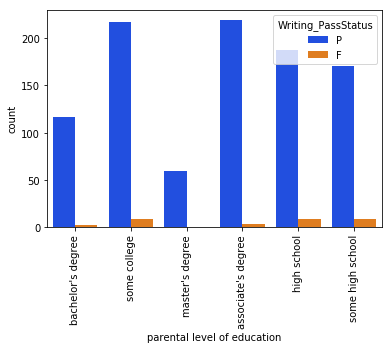

In [12]:
p = sns.countplot(x='parental level of education', data = dataset, hue='Writing_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

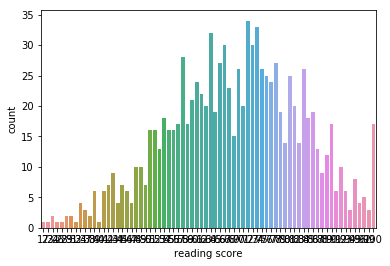

In [13]:
#Exploring Reading Score
sns.countplot(x="reading score", data = dataset)

#### Students Performance in Reading (Pass/Fail)Analysis

In [14]:
dataset['Reading_PassStatus'] = np.where(dataset['reading score']<passmark, 'F', 'P')
dataset.Reading_PassStatus.value_counts()

P    974
F     26
Name: Reading_PassStatus, dtype: int64

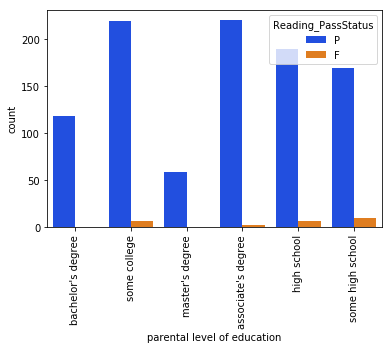

In [15]:
p = sns.countplot(x='parental level of education', data = dataset, hue='Reading_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

### Students Passed in all Subjects

In [16]:
dataset['OverAll_PassStatus'] = dataset.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or 
                                    x['Reading_PassStatus'] == 'F' or x['Writing_PassStatus'] == 'F' else 'P', axis =1)

dataset.OverAll_PassStatus.value_counts()

P    949
F     51
Name: OverAll_PassStatus, dtype: int64

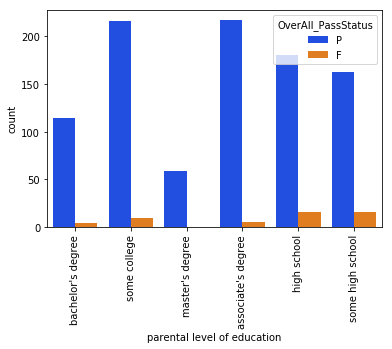

In [17]:
p = sns.countplot(x='parental level of education', data = dataset, hue='OverAll_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

In [18]:
dataset['Total_Marks'] = dataset['math score']+dataset['reading score']+dataset['writing score']
dataset['Percentage'] = dataset['Total_Marks']/3

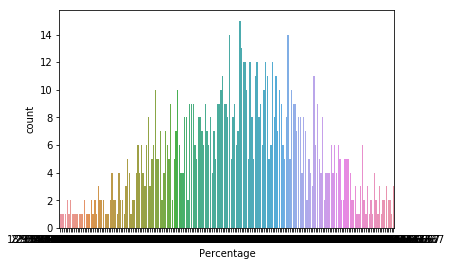

In [19]:
p = sns.countplot(x="Percentage", data = dataset)
 

Assigning Grade to the Students

In [20]:
def Cal_Grade(Percentage, OverAll_PassStatus):
    if ( OverAll_PassStatus == 'F'):
        return 'F'    
    if ( Percentage >= 80 ):
        return 'A'
    if ( Percentage >= 70):
        return 'B'
    if ( Percentage >= 60):
        return 'C'
    if ( Percentage >= 50):
        return 'D'
    if ( Percentage >= 40):
        return 'E'
    else: 
        return 'F'

dataset['Grade'] = dataset.apply(lambda x : Cal_Grade(x['Percentage'], x['OverAll_PassStatus']), axis=1)

dataset.Grade.value_counts()

B    261
C    256
A    198
D    178
E     56
F     51
Name: Grade, dtype: int64

Grading Plot

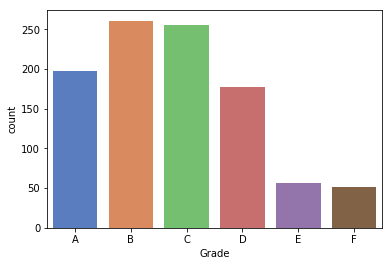

In [21]:
sns.countplot(x="Grade", data = dataset, order=['A','B','C','D','E','F'],  palette="muted")
plt.show()

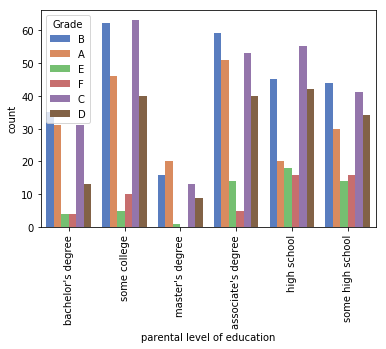

In [22]:
p = sns.countplot(x='parental level of education', data = dataset, hue='Grade', palette='muted')
_ = plt.setp(p.get_xticklabels(), rotation=90) 


In [23]:
dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Writing_PassStatus,Reading_PassStatus,OverAll_PassStatus,Total_Marks,Percentage,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P,218,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P,247,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P,278,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,P,P,P,P,148,49.333333,E
4,male,group C,some college,standard,none,76,78,75,P,P,P,P,229,76.333333,B
5,female,group B,associate's degree,standard,none,71,83,78,P,P,P,P,232,77.333333,B
6,female,group B,some college,standard,completed,88,95,92,P,P,P,P,275,91.666667,A
7,male,group B,some college,free/reduced,none,40,43,39,P,F,P,F,122,40.666667,F
8,male,group D,high school,free/reduced,completed,64,64,67,P,P,P,P,195,65.000000,C
9,female,group B,high school,free/reduced,none,38,60,50,F,P,P,F,148,49.333333,F


In [24]:
dataset.to_csv('Results.csv')